In [21]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Create a Set of Random Latitiude and Longitude Combinations to use: 

In [22]:
# Create a set of random latitiude and longitude combinations:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size =1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [23]:
# add lat and lngs to a list. can only unzip list once before removed from computer meory
coordinates = list(lat_lngs)

### Find Cities Closest to Randomly Found Latitiude and Longitude:

In [24]:
# use the citipy module to determine city based on long and lat
from citipy import citipy

In [25]:
# create a list for holding the cities
cities = []

# Identify the nearest cities for each lat and long combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add to the cities list
    if city not in cities:
        cities.append(city)
        
# print the city count. Note the citipy module finds cities with population of 500 or more
len(cities)

650

### Get Data for All Cities using API and JSON

In [26]:
# import the requests library
import requests

# import the API key
from config import weather_api_key

In [40]:
weather_api_key

'f2ab6d16446022a261d3ce5400215734'

In [42]:
# starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2ab6d16446022a261d3ce5400215734$q=rikitea'

In [28]:
# Import the datetime module from the datetime library
from datetime import datetime

In [45]:
# Initialize counters and an empty list that will hold weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group the cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1    

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1 

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | urazovo
Processing Record 3 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 4 of Set 1 | digha
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | tshela
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | wagar
Processing Record 11 of Set 1 | tawnat
City not found. Skipping...
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | bambous virieux
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | cap malheureux
Processing Record 16 of Set 1 | mayna
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | cabatuan
Processing Record 21 of Set 1 | kiunga
Proc

Processing Record 41 of Set 4 | sokolo
Processing Record 42 of Set 4 | bichura
Processing Record 43 of Set 4 | ortega
Processing Record 44 of Set 4 | luanda
Processing Record 45 of Set 4 | margate
Processing Record 46 of Set 4 | tonami
Processing Record 47 of Set 4 | mahebourg
Processing Record 48 of Set 4 | hay river
Processing Record 49 of Set 4 | bocaranga
City not found. Skipping...
Processing Record 50 of Set 4 | nakamura
Processing Record 1 of Set 5 | port elizabeth
Processing Record 2 of Set 5 | dikson
Processing Record 3 of Set 5 | dzhusaly
City not found. Skipping...
Processing Record 4 of Set 5 | sambava
Processing Record 5 of Set 5 | portmore
Processing Record 6 of Set 5 | umm ruwabah
City not found. Skipping...
Processing Record 7 of Set 5 | colon
Processing Record 8 of Set 5 | mitu
Processing Record 9 of Set 5 | guadalajara
Processing Record 10 of Set 5 | sinnamary
Processing Record 11 of Set 5 | kamenka
Processing Record 12 of Set 5 | puerto carreno
Processing Record 13 o

Processing Record 26 of Set 8 | broken hill
Processing Record 27 of Set 8 | isangel
Processing Record 28 of Set 8 | san quintin
Processing Record 29 of Set 8 | humberto de campos
Processing Record 30 of Set 8 | tura
Processing Record 31 of Set 8 | lasa
Processing Record 32 of Set 8 | vestmannaeyjar
Processing Record 33 of Set 8 | ginir
Processing Record 34 of Set 8 | yerbogachen
Processing Record 35 of Set 8 | kodiak
Processing Record 36 of Set 8 | clarence town
Processing Record 37 of Set 8 | leningradskiy
Processing Record 38 of Set 8 | kuche
City not found. Skipping...
Processing Record 39 of Set 8 | athabasca
Processing Record 40 of Set 8 | porto belo
Processing Record 41 of Set 8 | turukhansk
Processing Record 42 of Set 8 | pasni
Processing Record 43 of Set 8 | talisay
Processing Record 44 of Set 8 | saint-joseph
Processing Record 45 of Set 8 | qui nhon
Processing Record 46 of Set 8 | ddmashen
Processing Record 47 of Set 8 | myitkyina
Processing Record 48 of Set 8 | hailun
Process

Processing Record 19 of Set 12 | kaoma
Processing Record 20 of Set 12 | imbituba
Processing Record 21 of Set 12 | wuda
Processing Record 22 of Set 12 | faanui
Processing Record 23 of Set 12 | bengkulu
Processing Record 24 of Set 12 | middleton
Processing Record 25 of Set 12 | maceio
Processing Record 26 of Set 12 | kupino
Processing Record 27 of Set 12 | sungai padi
Processing Record 28 of Set 12 | sawtell
Processing Record 29 of Set 12 | santa fe
Processing Record 30 of Set 12 | elizabeth city
Processing Record 31 of Set 12 | kuvandyk
Processing Record 32 of Set 12 | solnechnyy
Processing Record 33 of Set 12 | asfi
Processing Record 34 of Set 12 | baruun-urt
Processing Record 35 of Set 12 | yudong
Processing Record 36 of Set 12 | san luis
Processing Record 37 of Set 12 | gurkovo
Processing Record 38 of Set 12 | goderich
Processing Record 39 of Set 12 | okahandja
Processing Record 40 of Set 12 | muscat
Processing Record 41 of Set 12 | wladyslawowo
Processing Record 42 of Set 12 | vanav

In [47]:
len(city_data)

604

In [48]:
# 8. Convert the list to a DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,73.85,74,1,11.72,PF,2021-07-12 23:20:10
1,Urazovo,50.0836,38.0395,66.65,67,0,6.38,RU,2021-07-12 23:23:39
2,Digha,21.6833,87.5500,82.85,79,99,8.43,IN,2021-07-12 23:24:06
3,Tiksi,71.6872,128.8694,46.15,67,43,7.94,RU,2021-07-12 23:24:07
4,Georgetown,5.4112,100.3354,79.90,88,40,2.30,MY,2021-07-12 23:24:07
5,Albany,42.6001,-73.9662,71.55,95,99,1.99,US,2021-07-12 23:24:07
6,Tshela,-4.9833,12.9333,65.84,97,46,2.33,CD,2021-07-12 23:24:07
7,Port Alfred,-33.5906,26.8910,53.13,79,75,29.01,ZA,2021-07-12 23:24:08
8,Wagar,16.1525,36.2032,85.55,55,80,15.61,SD,2021-07-12 23:24:08
9,Ushuaia,-54.8000,-68.3000,35.26,80,75,13.80,AR,2021-07-12 23:20:37


In [49]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-07-12 23:20:10,-23.1203,-134.9692,73.85,74,1,11.72
1,Urazovo,RU,2021-07-12 23:23:39,50.0836,38.0395,66.65,67,0,6.38
2,Digha,IN,2021-07-12 23:24:06,21.6833,87.5500,82.85,79,99,8.43
3,Tiksi,RU,2021-07-12 23:24:07,71.6872,128.8694,46.15,67,43,7.94
4,Georgetown,MY,2021-07-12 23:24:07,5.4112,100.3354,79.90,88,40,2.30
5,Albany,US,2021-07-12 23:24:07,42.6001,-73.9662,71.55,95,99,1.99
6,Tshela,CD,2021-07-12 23:24:07,-4.9833,12.9333,65.84,97,46,2.33
7,Port Alfred,ZA,2021-07-12 23:24:08,-33.5906,26.8910,53.13,79,75,29.01
8,Wagar,SD,2021-07-12 23:24:08,16.1525,36.2032,85.55,55,80,15.61
9,Ushuaia,AR,2021-07-12 23:20:37,-54.8000,-68.3000,35.26,80,75,13.80


In [52]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [53]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

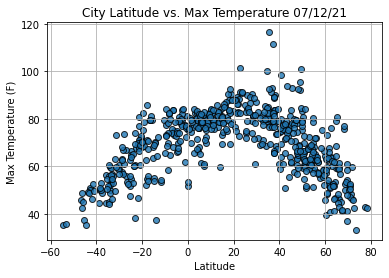

In [59]:
# Import the time module
import time

# Build the scatter plot for latitude vs max temp
plt.scatter(lats, max_temps, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

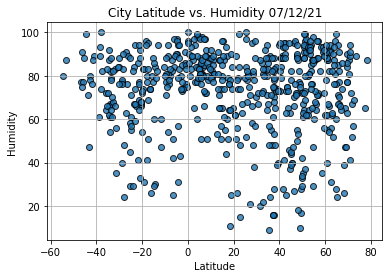

In [61]:
# Build the scatter plot for latitude vs humidity
plt.scatter(lats, humidity, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

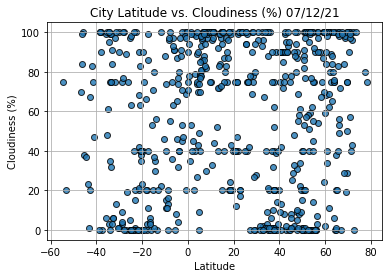

In [62]:
# Build the scatter plot for latitude vs cloudiness
plt.scatter(lats, cloudiness, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

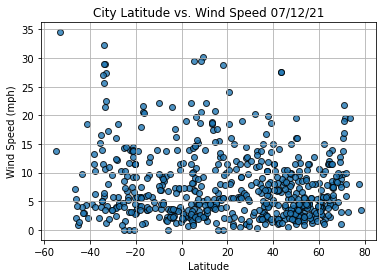

In [63]:
# Build the scatter plot for latitude vs wind speed
plt.scatter(lats, wind_speed, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()